# Testing

In [2]:
import pandas as pd
import yahooquery as yq
import model.investor_views as views
from tqdm import tqdm
from model.model import Model

## Model

In [3]:
num_years=100 # years
bounds=(-0.3, 1.0) # percent
gamma=0.0 # decimal
min_weight=0.05 # percent
margin_rate=0.132 # percent
long_weight=1.3 # percent
short_weight=0.3 # percent
frequency=252 # periods per year
period='max' # '1d', '5d', '7d', '60d', '1mo', '3mo', '6mo', '1y', '2y', '5y', '10y', 'ytd', 'max'
api_source='bloomberg' # yahoo or bloomberg
market_symbol='SPY' # benchmark index ticker
etf_path='https://raw.githubusercontent.com/nathanramoscfa/nrcapital/main/data/etf_cape_return_forecast.csv'
stock_path='https://raw.githubusercontent.com/nathanramoscfa/nrcapital/main/data/stock_cape_return_forecast.csv'

In [4]:
def get_nrcapital_forecast(filepath, min_long_return=0.15, max_short_return=0.0):
    """
    :description: Get equity ETF data and filter ETFs by expected return
    
    :param filepath: Filepath to nrcapital forecasts
    :type filepath: str, required
    :param min_long_return: Minimum required long return, default is 0.15
    :type min_long_return: float, optional
    :param max_short_return: Maximum tolerable short return, default is 0.0
    :type max_short_return: float, optional
    :return: Selected equity ETFs
    :rtype: tuple
    """
    equity_etf_csv = pd.read_csv(r'{}'.format(filepath))
    
    selected_equity_etfs = equity_etf_csv[
        (equity_etf_csv['FWD_RETURN_FORECAST'] >= min_long_return) |
        (equity_etf_csv['FWD_RETURN_FORECAST'] <= max_short_return)
    ]

    return selected_equity_etfs

In [5]:
selected_equity_etfs = get_nrcapital_forecast(etf_path)
selected_equity_etfs

,TICKER,NAME,INDEX_NAME,CAPE,FWD_RETURN_FORECAST,LOWER_CONFIDENCE,UPPER_CONFIDENCE,F_PVALUE,INDEX_TICKER,MINIMUM_CAPE,MAXIMUM_CAPE,RSQUARED
63,OIH,VanEck Oil Services ETF,Philadelphia Stock Exchange Oil Service Sector,12.41,-0.1173,-0.3601,0.1253,0.0,OSX,6.04,58.94,0.3248
85,PSCD,Invesco S&P SmallCap Consumer Discretionary ETF,S&P 600 Consumer Discretionary Sector,12.46,0.2303,0.1165,0.3447,0.0,S6COND,9.02,30.87,0.5729
88,IJR,iShares Core S&P Small-Cap ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
89,FYX,First Trust Small Cap Core AlphaDEX Fund,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
90,SLY,SPDR S&P 600 Small CapETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
91,SPSM,SPDR Portfolio S&P 600 Small Cap ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
92,VIOO,Vanguard S&P Small-Cap 600 ETF,S&P Small Cap 600,15.36,0.2178,0.1506,0.2859,0.0,SML,11.78,31.38,0.6498
93,IJT,iShares S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282
94,SLYG,SPDR S&P 600 Small Cap Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282
95,VIOG,Vanguard S&P Small-Cap 600 Growth ETF,S&P Small Cap 600 Growth,22.56,0.1957,0.1232,0.2687,0.0,SMLG,14.37,45.65,0.6282


In [6]:
symbols = list(selected_equity_etfs.TICKER)

In [7]:
model = Model(
    symbols,
    num_years,
    bounds,
    gamma,
    min_weight,
    margin_rate,
    long_weight,
    short_weight,
    frequency,
    period,
    api_source,
    market_symbol
)

In [8]:
historical_prices = model.get_historical_prices()
historical_prices

,VOOV,OIH,PSCD,IJR,FYX,SLY,SPSM,VIOO,IJT,SLYG,VIOG,IJS,SLYV,VIOV,IUSV,IVE,SPYV
date,,,,,,,,,,,,,,,,,
2013-07-09,59.9378,758.1178,38.5592,41.2907,38.0509,35.7940,17.1322,37.9872,46.4313,30.7480,39.8089,42.3435,34.0908,36.2005,29.9659,62.3408,16.6089
2013-07-10,59.8417,753.0816,38.5197,41.3605,38.1244,35.9360,17.1834,38.0629,46.4450,30.8105,39.8587,42.4515,34.1853,36.3122,29.8907,62.2610,16.5913
2013-07-12,60.6741,759.2929,39.0389,41.8274,38.6668,36.3540,17.5243,38.5479,47.0160,31.2443,40.3800,42.8879,34.5671,36.7338,30.3709,63.1391,16.8332
2013-07-15,60.9702,758.2857,39.1124,42.0237,38.8691,36.5275,17.6066,38.6858,47.1603,31.3350,40.4623,43.1601,34.7993,36.9575,30.4910,63.3626,16.8887
2013-07-16,60.6661,751.4029,38.7315,41.8492,38.7036,36.2909,17.5754,38.5123,46.9383,31.1876,40.1927,43.0132,34.6612,36.8199,30.3091,63.1071,16.8129
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-23,139.9196,258.6400,84.7176,92.2700,76.5716,79.9900,36.0400,84.7300,105.4600,70.7800,91.0109,88.8200,72.3000,76.7656,70.2900,144.6900,38.8300
2023-03-24,140.9500,257.3800,85.0461,93.2500,77.3100,80.8900,36.4400,85.6700,106.6200,71.3800,91.9700,89.9100,73.1200,77.5500,70.8800,145.8700,39.1400
2023-03-27,141.6900,268.6200,85.3400,94.2500,78.4200,81.7600,36.7900,86.6800,107.7400,72.1400,92.8600,90.8200,73.8700,78.3900,71.2400,146.6300,39.3400


In [9]:
risk_free_rate = model.get_risk_free_rate(prints=True)

------------------------------------
Risk Free Rate: 3.58%


In [10]:
market_caps = model.get_market_caps(prints=True)


Market Cap ($Millions):
IJR     $65,560.38
IVE     $24,023.40
SPYV    $14,311.79
IUSV    $13,001.32
IJS      $6,861.40
IJT      $4,919.51
SPSM     $4,896.95
SLYV     $3,799.33
VOOV     $3,130.26
OIH      $2,427.23
SLYG     $2,313.39
VIOO     $2,220.77
SLY      $1,693.53
VIOV     $1,268.70
FYX        $783.98
VIOG       $505.28
PSCD        $27.55
Name: CUR_MKT_CAP, dtype: object


In [11]:
vif_symbols = model.vif_filter(historical_prices, market_caps, threshold=50, prints=True)


VIF Tickers:
TICKER
OIH      2.37
PSCD     4.38
SPYV     5.00
VIOV    23.44
VIOG    23.68
SPSM    29.95
FYX     32.29
Name: VIF Factor, dtype: float64


In [12]:
investor_views, confidences = views.investor_views_confidences(selected_equity_etfs, vif_symbols, prints=True)


Investor Views:
TICKER
VIOV     23.39%
PSCD     23.03%
FYX      21.78%
SPSM     21.78%
VIOG     19.57%
SPYV     -0.85%
OIH     -11.73%
Name: Investor Views, dtype: object

View Confidences:
TICKER
VIOV    73.60%
FYX     64.98%
SPSM    64.98%
VIOG    62.82%
PSCD    57.29%
SPYV    48.32%
OIH     32.48%
Name: Confidences, dtype: object


In [13]:
market_symbol, market_name, market_prices = model.get_market_prices(historical_prices, vif_symbols, prints=True)

Market Symbol: SPY US Equity
Market Name: SPDR S&P 500 ETF Trust

Market Prices:
date
2013-07-09    $137.96
2013-07-10    $138.01
2013-07-11    $139.89
2013-07-12    $139.95
2013-07-15    $140.49
               ...   
2023-03-23    $393.17
2023-03-24    $395.75
2023-03-27    $396.49
2023-03-28    $395.60
2023-03-29    $401.35
Name: SPDR S&P 500 ETF Trust, Length: 2449, dtype: object


In [14]:
market_implied_risk_aversion = model.market_implied_risk_aversion(market_prices, risk_free_rate, prints=True)


Market Implied Risk Aversion:
Delta: 2.9


In [15]:
covariance_matrix = model.calculate_covariance_matrix(historical_prices, vif_symbols, prints=True)


Covariance Matrix:
         FYX     OIH    PSCD    SPSM    SPYV    VIOG    VIOV
FYX   0.0566  0.0705  0.0560  0.0519  0.0363  0.0511  0.0529
OIH   0.0705  0.1858  0.0620  0.0641  0.0500  0.0582  0.0694
PSCD  0.0560  0.0620  0.0758  0.0531  0.0346  0.0525  0.0540
SPSM  0.0519  0.0641  0.0531  0.0506  0.0344  0.0485  0.0497
SPYV  0.0363  0.0500  0.0346  0.0344  0.0305  0.0336  0.0349
VIOG  0.0511  0.0582  0.0525  0.0485  0.0336  0.0497  0.0481
VIOV  0.0529  0.0694  0.0540  0.0497  0.0349  0.0481  0.0526


In [16]:
posterior_covariance_matrix, posterior_expected_returns = model.calculate_black_litterman(
    covariance_matrix,
    market_prices, 
    risk_free_rate, 
    market_caps, 
    vif_symbols, 
    investor_views,
    confidences, 
    prints=True
)

Delta:
2.9

Prior Expected Returns:
OIH     23.39%
FYX     16.55%
PSCD    16.11%
VIOV    16.10%
SPSM    15.87%
VIOG    15.41%
SPYV    13.37%
dtype: object

Posterior Expected Returns:
PSCD    21.54%
FYX     19.73%
VIOV    19.28%
SPSM    19.03%
VIOG    18.77%
OIH     18.20%
SPYV    12.42%
dtype: object


In [17]:
min_volatility, min_weights, min_results = model.minimum_risk_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)

Minimum Risk Portfolio:
Minimum Volatility: 16.79%

Weights:
SPYV    100.00%
VIOV     15.84%
VIOG     14.16%
OIH     -12.60%
FYX     -17.40%
Name: Minimum Risk Portfolio, dtype: object

Results:
Expected_Return         8.45%
Expected Volatility    16.79%
Sharpe_Ratio           0.5257
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 100.0%
Long weights sum: 130.0%
Short weights sum: -30.0%


In [18]:
max_volatility, max_weights, max_results = model.maximum_risk_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)

Maximum Risk Portfolio:
Maximum Volatility: 30.16%

Weights:
PSCD    100.00%
FYX      30.00%
SPYV    -30.00%
Name: Maximum Risk Portfolio, dtype: object

Results:
Expected_Return        19.78%
Expected Volatility    30.16%
Sharpe_Ratio           0.6684
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 100.0%
Long weights sum: 130.0%
Short weights sum: -30.0%


In [19]:
max_sharpe_weights, max_sharpe_results = model.maximum_sharpe_portfolio(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=True
)


Maximum Sharpe Portfolio:
Sharpe Ratio: 0.727

Weights:
VIOV     59.80%
SPSM     36.06%
PSCD     16.00%
FYX      10.91%
VIOG      7.23%
OIH     -13.92%
SPYV    -16.08%
Name: Maximum Sharpe Portfolio, dtype: object

Results:
Expected_Return        16.86%
Expected Volatility    23.71%
Sharpe_Ratio            0.727
Name: Results, dtype: object

Long/Short Ratio:
Portfolio weights sum: 100.0%
Long weights sum: 130.0%
Short weights sum: -30.0%


C:\Users\25del\anaconda3\envs\etradebot\Lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:257: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


In [20]:
portfolios, results = model.efficient_frontier_portfolios(
    posterior_expected_returns, posterior_covariance_matrix, risk_free_rate, prints=False
)
portfolios

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 57.32it/s]


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
TICKER,,,,,,,,,,,,,,,,,,,,
FYX,-0.1602,-0.1557,-0.1523,-0.1494,-0.1469,-0.1445,-0.1376,-0.0981,-0.0598,0.0000,0.1320,0.2519,0.3375,0.4142,0.4854,0.5572,0.6419,0.5396,0.4201,0.3143
OIH,-0.1398,-0.1443,-0.1477,-0.1506,-0.1531,-0.1555,-0.1578,-0.1605,-0.1632,-0.1661,-0.1346,-0.1054,-0.0752,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
PSCD,0.0000,0.0000,0.0000,0.0520,0.0576,0.0628,0.0675,0.0714,0.0751,0.0790,0.1742,0.2566,0.3315,0.3986,0.4610,0.5219,0.6307,0.7604,0.8799,0.9857
SPSM,0.0000,0.0928,0.1506,0.1988,0.2418,0.2821,0.3183,0.3458,0.3726,0.3938,0.3539,0.2978,0.2160,0.1429,0.0749,0.0000,0.0000,0.0000,0.0000,0.0000
SPYV,0.9702,0.7592,0.6008,0.4685,0.3502,0.2398,0.1381,0.0000,0.0000,-0.1304,-0.1655,-0.1946,-0.2248,-0.2519,-0.2770,-0.3000,-0.3000,-0.3000,-0.3000,-0.3000
VIOG,0.0630,0.0895,0.1094,0.1260,0.1408,0.1547,0.1657,0.1633,0.1610,0.1500,0.0573,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
VIOV,0.2225,0.3202,0.3935,0.4547,0.5095,0.5606,0.6058,0.6334,0.6604,0.6772,0.5826,0.4938,0.4149,0.3443,0.2787,0.2158,0.0000,0.0000,0.0000,0.0000


In [21]:
results

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Expected_Return,0.1234,0.1375,0.1480,0.1567,0.1645,0.1719,0.1788,0.1857,0.1926,0.1975,0.2026,0.2070,0.2109,0.2152,0.2181,0.2208,0.2236,0.2259,0.2280,0.2299
Expected Volatility,0.1689,0.1758,0.1828,0.1897,0.1966,0.2036,0.2105,0.2174,0.2244,0.2313,0.2382,0.2451,0.2521,0.2590,0.2659,0.2729,0.2798,0.2867,0.2937,0.3006
Sharpe_Ratio,0.5418,0.6027,0.6389,0.6634,0.6813,0.6950,0.7054,0.7136,0.7202,0.7253,0.7270,0.7250,0.7209,0.7156,0.7097,0.7032,0.6961,0.6879,0.6789,0.6697


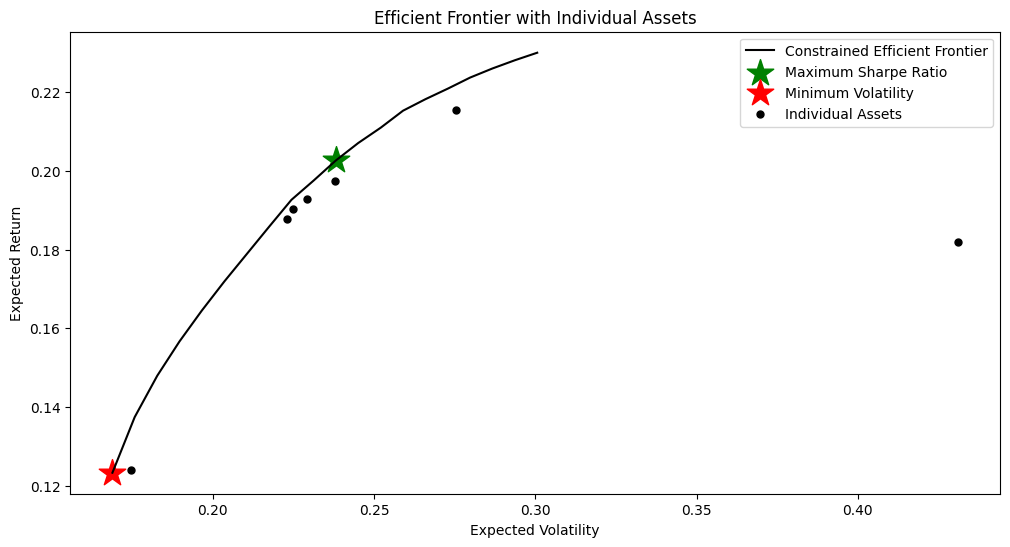

In [22]:
model.plot_efficient_frontier(posterior_expected_returns, results, covariance_matrix, figsize=(12, 6))

In [23]:
# max_sharpe_weights.to_csv('new_portfolio.csv')

In [24]:
max_sharpe_weights

VIOV    0.5980
SPSM    0.3606
PSCD    0.1600
FYX     0.1091
VIOG    0.0723
OIH    -0.1392
SPYV   -0.1608
Name: Maximum Sharpe Portfolio, dtype: float64